##### Dataset

In [1]:
# File: SMSSpamCollection
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Read the file

In [3]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.shape

(5572, 2)

In [6]:
df.loc[3,'text']

'U dun say so early hor... U c already then say...'

##### Separate the input and output data

In [7]:
# input
x = df['text']

# output 
y = df['label']

In [8]:
set(y)

{'ham', 'spam'}

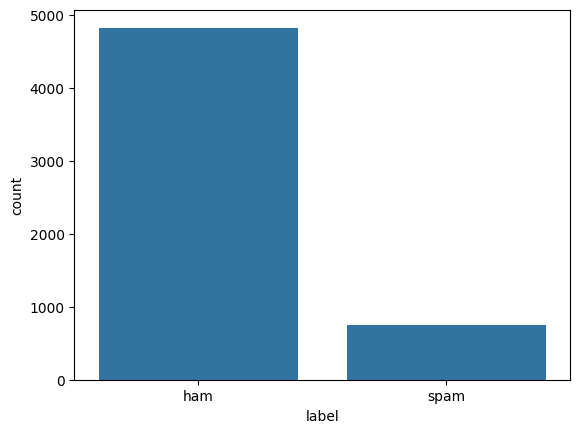

In [9]:
sns.countplot(x=y);

In [10]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

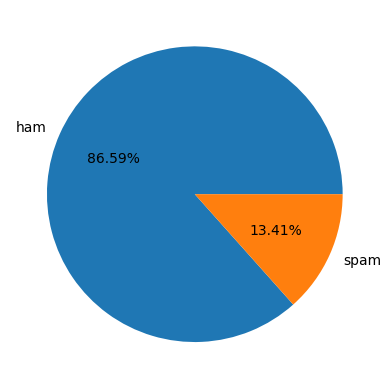

In [11]:
plt.pie(y.value_counts(), labels=y.value_counts().index,  autopct='%2.2f%%');

In [41]:
pip install pip -U

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install pillow wordcloud -U

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [46]:
# Filtered the spame and ham messages
spam = x[y=='spam']
not_spam = x[y=='ham']

In [48]:
spam.shape

(747,)

In [50]:
not_spam.shape

(4825,)

In [54]:
spam = ' '.join(spam)
not_spam = ' '.join(not_spam)

In [55]:
from wordcloud import WordCloud

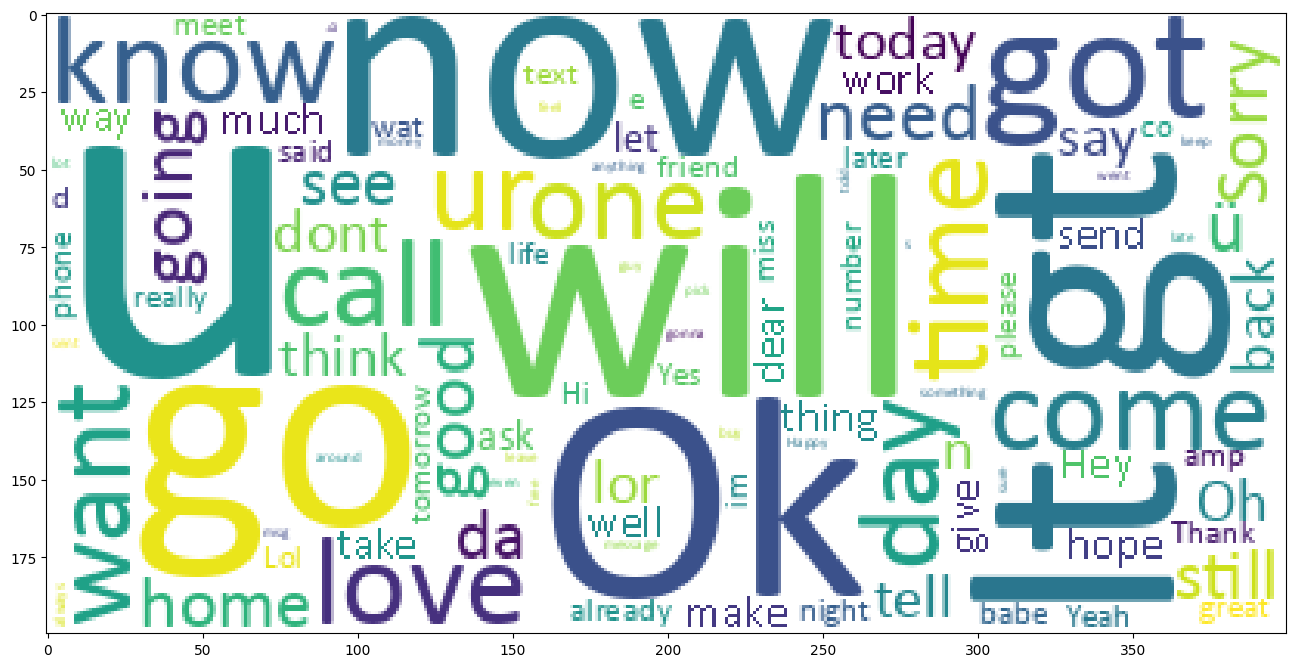

In [66]:
wc_notspam = WordCloud(font_path='calibri.ttf',
               background_color='white',
              max_words=100).generate(not_spam)

plt.figure(figsize=(16,9))
plt.imshow(wc_notspam)

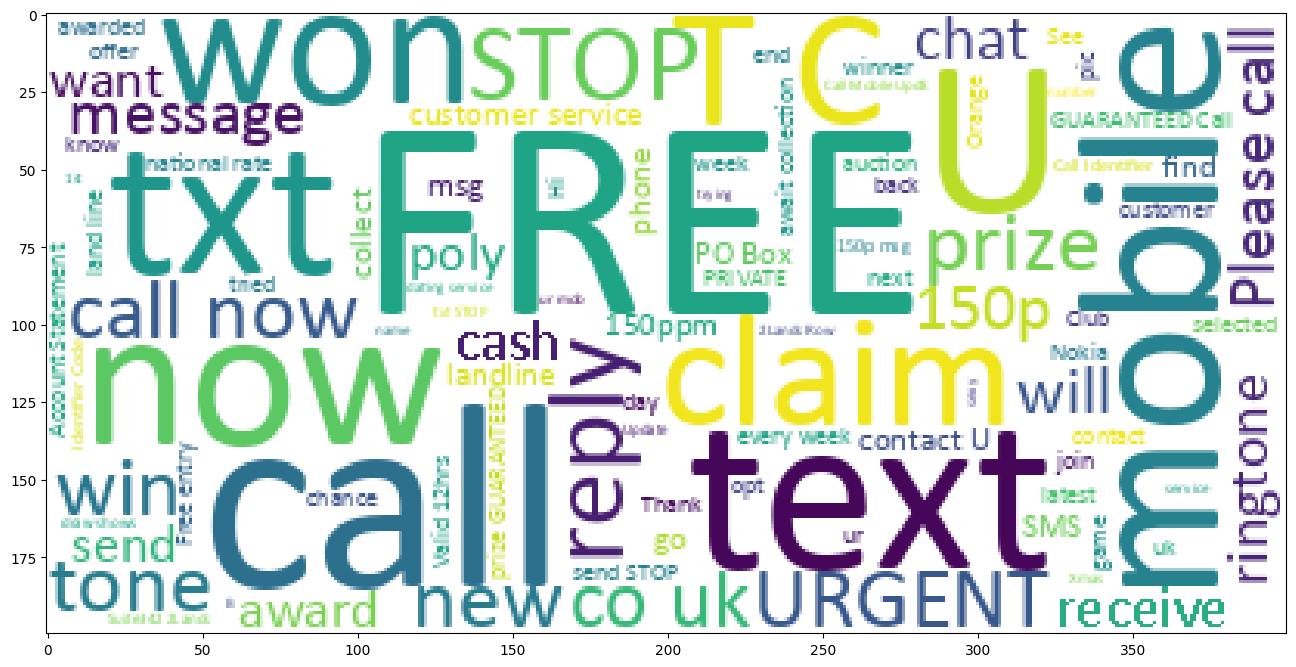

In [67]:
wc_spam = WordCloud(font_path='calibri.ttf',
               background_color='white',
              max_words=100).generate(spam)

plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

In [69]:
wc_spam.words_

{'FREE': 1.0,
 'call': 0.875,
 'text': 0.63,
 'U': 0.59,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.5,
 'won': 0.365,
 'T C': 0.33,
 'claim': 0.315,
 'STOP': 0.315,
 'reply': 0.31,
 'prize': 0.305,
 'call now': 0.29,
 'URGENT': 0.28,
 'win': 0.27,
 'new': 0.27,
 'tone': 0.265,
 'co uk': 0.245,
 '150p': 0.24,
 'Please call': 0.23,
 'will': 0.22,
 'message': 0.21,
 'chat': 0.2,
 'ringtone': 0.18,
 'cash': 0.17,
 'receive': 0.165,
 'send': 0.145,
 'award': 0.14,
 'want': 0.135,
 'poly': 0.135,
 'customer service': 0.135,
 'PO Box': 0.135,
 'contact U': 0.135,
 'msg': 0.125,
 'go': 0.125,
 'SMS': 0.12,
 'landline': 0.12,
 '150ppm': 0.115,
 'find': 0.115,
 'collect': 0.115,
 'phone': 0.115,
 'GUARANTEED Call': 0.115,
 'day': 0.11,
 'uk': 0.11,
 'offer': 0.11,
 'chance': 0.11,
 'prize GUARANTEED': 0.11,
 'contact': 0.105,
 'pic': 0.105,
 'week': 0.1,
 'customer': 0.1,
 'send STOP': 0.1,
 'national rate': 0.1,
 'back': 0.095,
 'ur': 0.095,
 'awarded': 0.095,
 'See': 0.095,
 'Club': 0.095,
 'Orang

##### Data Preparation

In [71]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [72]:
sent = 'Hello friends! How are you? I like Python Programming.'

In [73]:
# 1. Tokenize the text
tokens1 = word_tokenize(sent)

In [74]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 '.']

In [76]:
# 2. Remove the punctuations
tokens2 = [token for token in tokens1 if token.isalnum()]

In [78]:
tokens2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']

In [80]:
# 3. Remove stopwords
swords = stopwords.words('english')

In [82]:
tokens3 = [token for token in tokens2 if token.lower() not in swords]

In [83]:
tokens3

['Hello', 'friends', 'like', 'Python', 'Programming']

In [84]:
# 4. Remove the suffixes
ps = PorterStemmer()

In [85]:
tokens4 = [ps.stem(token) for token in tokens3]

In [86]:
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [87]:
# define analyzer function
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalnum()]
    tokens3 = [token for token in tokens2 if token.lower() not in swords]
    tokens4 = [ps.stem(token) for token in tokens3]
    return tokens4

In [88]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [89]:
sent1 = 'It was the expected result on that occasion.'

In [91]:
clean_text(sent1)

['expect', 'result', 'occas']

In [96]:
x.loc[400]

'Hmmm...k...but i want to change the field quickly da:-)i wanna get system administrator or network administrator..'

In [97]:
clean_text(x.loc[400])

['hmmm',
 'k',
 'want',
 'chang',
 'field',
 'quickli',
 'da',
 'wan',
 'na',
 'get',
 'system',
 'administr',
 'network',
 'administr']

In [98]:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

##### TF*IDF Vectorizer

In [100]:
# import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
# create the object
tfidf = TfidfVectorizer(analyzer=clean_text)

In [102]:
# apply
x_new = tfidf.fit_transform(x)

In [103]:
x_new

<5572x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 47556 stored elements in Compressed Sparse Row format>

##### Cross-Validation

In [105]:
# import the function
from sklearn.model_selection import train_test_split

In [106]:
# seperate the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0)

In [107]:
x_train.shape

(4179, 6854)

In [108]:
x_test.shape

(1393, 6854)

In [109]:
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'é', 'ü', '〨ud'], dtype=object)

##### Build the machine learning classification model

In [111]:
# import the class
from sklearn.svm import SVC

In [157]:
# create the object
svm = SVC(kernel='linear', random_state=0)

In [158]:
%%time
svm.fit(x_train, y_train)

CPU times: user 307 ms, sys: 2.56 ms, total: 309 ms
Wall time: 308 ms


SVC(kernel='linear', random_state=0)

##### Performance Evaluation

In [159]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

In [160]:
y_pred = svm.predict(x_test)

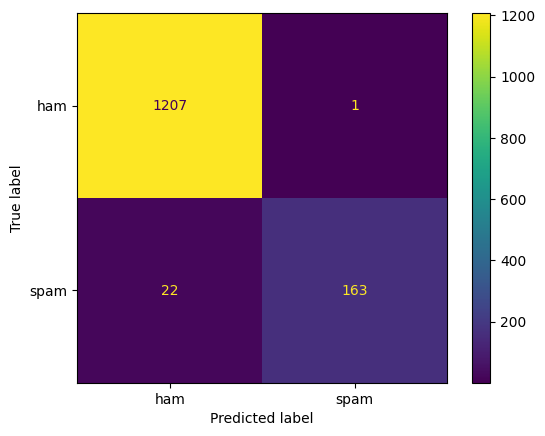

In [161]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [163]:
accuracy_score(y_test, y_pred)

0.9834888729361091

In [164]:
# RBF -> 0.9798994974874372
# Linear -> 0.9834888729361091
# Poly -> 0.9361091170136396
# Sigmoid -> 0.9806173725771715

##### Prediction on unseen data

In [156]:
# File: sample.csv
# Location: https://mitu.co.in/dataset

In [169]:
f = open('sample.csv')

In [170]:
data = f.readlines()

In [171]:
data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [172]:
tfidf.transform(data)

<3x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [173]:
svm.predict(tfidf.transform(data))

array(['ham', 'spam', 'ham'], dtype=object)